
# Considerações

O modelo de relatório em *jupyter notebook* foi adotado pretendendo uma melhor visualização dos dados e entendimento dos processos utilzados.O objetivo dessa caderno é a intdodução de procedimentos básicos de ciência de dados que precedem o aprendizado de máquina, dessa forma cada tópico foi devidamente comentado.

Esre relatório está dividido nos seguintes tópicos:
    
1. **Análise Exploratória de Dados (AED)**  

    * Estudo dos dados brutos
    * Análise dos tipos de variáveis 
    
    * Informações faltantes 
    
    * Estatística descritiva simples
    
    * Correções
    
    * Distribuições
    
    * Detecção e Substituição de *Outliers*
    
    * Correlações
    
    * Conclusão do tópico
    

2. **Modelagem**
    * Definição do *input* e *output*
    
    * Validação cruzada e a escolhendo do modelo 
    
    * Otimização do modelo 
    
    * Avaliação do modelo
    
    * Conclusão do tópico
    
3. **Referências**

    
Forma utlizadas as seguintes bibliotecas e configuraçãoes:

In [1]:
#Básico 
import pandas as pd
import numpy as np 
from scipy.stats import mstats
pd.set_option('display.max_columns', 20)

#Graficos
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Tratamento de dados
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC


# Otimização dos modelos
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,KFold

# Métricas de avaliação dos modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score , roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

# Disabilitarv avisos
import warnings
warnings.filterwarnings('ignore')

<hr style="border:1px solid black"> </hr>
<span style='font-family:"Times New Roman"'>

# 1. Análise Exploratória de Dados (AED)

Essa etapa é fundamental para entendimento das variáveis do banco de dados. Uma vez compreendidos, os dados podem ser utilizados de forma adequada na criação e avaliação de modelos de classificação.

___
<span style='font-family:"Times New Roman"'>
    
## 1.1. Análise dos Dados Brutos

Uma gama de informações pode ser extraída dos dados sem uma Análise Exploratória de Dados (AED) formal. A visualização de dados brutos tem como objetivo entendimento (mesmo que mínimo) do problema e avaliação qualidade da informação registrada.


In [2]:
# Ler dados
df=pd.read_csv('Lista1.csv',sep=';')
# Amostra aleatória de dados 
print('\033[1m' "\n TABELA 1: AMOSTRA DO BANCO DE DADOS  \n")
df.sample(10,random_state=42)


 TABELA 1: AMOSTRA DO BANCO DE DADOS  



,Patient,Age,HealthFactor1,HealthFactor2,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,PreviousSurgery,SkinThickness,Insulin,Inheritance,Outcome
694,p695,25,24.70,97.0,23.5,0.191,2,90,60,0.0,0,0,1.0,0
665,p666,24,26.16,146.0,34.8,0.217,1,112,80,NaN,45,132,0.0,0
63,p64,24,24.28,182.0,25.4,0.699,2,141,58,0.0,34,128,NaN,0
533,p534,31,30.76,92.0,29.8,0.501,6,91,0,0.0,0,0,NaN,0
66,p67,38,36.90,80.0,32.5,0.855,0,109,88,0.0,30,0,0.0,1
621,p622,28,27.24,103.0,24.2,1.698,2,92,76,0.0,20,0,0.0,0
346,p347,22,23.34,169.0,28.7,0.654,1,139,46,0.0,19,83,0.0,0
490,p491,24,26.56,136.0,36.8,0.629,2,83,65,0.0,28,66,NaN,0
645,p646,30,31.88,51.0,39.4,0.134,2,157,74,0.0,35,440,NaN,0
456,p457,62,54.94,194.0,26.7,0.687,1,135,54,0.0,0,0,NaN,0


___
<span style='font-family:"Times New Roman"'>

## 1.2. Tipo das Variáveis
A Tabela 2 apresenta os tipos de variáveis presentes no banco de dados. Observa-se que, com exceção da a variável *Patient*, todas as variáveis são numéricas.  


In [3]:
# Para cada coluna identificar o tipo de variável 
tipos=[str(type(df[coluna][0])) for coluna in df.columns]
dic={'Variável':df.columns,'Tipo':tipos}
Tab_1=pd.DataFrame(data=dic,index=None)
print('\033[1m' "\n TABELA 2: TIPO DAS VARIÁVEIS  \n")
Tab_1


 TABELA 2: TIPO DAS VARIÁVEIS  



,Variável,Tipo
0,Patient,<class 'str'>
1,Age,<class 'numpy.int64'>
2,HealthFactor1,<class 'numpy.float64'>
3,HealthFactor2,<class 'numpy.float64'>
4,BMI,<class 'numpy.float64'>
5,DiabetesPedigreeFunction,<class 'numpy.float64'>
6,Pregnancies,<class 'numpy.int64'>
7,Glucose,<class 'numpy.int64'>
8,BloodPressure,<class 'numpy.int64'>
9,PreviousSurgery,<class 'numpy.float64'>


___

<span style='font-family:"Times New Roman"'>
    
## 1.3. Informações Faltantes
A Tabela 3 apresenta a contagem de informações não nulas, lembrando que nulo indica informação faltante e 0 que variável está preenchida com este valor. Observa-se que a variável *Inheritance* possui o maior número de informações faltantes	.


In [4]:
print('\033[1m' "\n TABELA 3: INFORMAÇÕES FALTANTES  \n")
df.info()


 TABELA 3: INFORMAÇÕES FALTANTES  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 14 columns):
Patient                     798 non-null object
Age                         798 non-null int64
HealthFactor1               798 non-null float64
HealthFactor2               787 non-null float64
BMI                         798 non-null float64
DiabetesPedigreeFunction    798 non-null float64
Pregnancies                 798 non-null int64
Glucose                     798 non-null int64
BloodPressure               798 non-null int64
PreviousSurgery             752 non-null float64
SkinThickness               798 non-null int64
Insulin                     798 non-null int64
Inheritance                 429 non-null float64
Outcome                     798 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 87.4+ KB


___
<span style='font-family:"Times New Roman"'>
    
## 1.4. Estatística Descritiva Simples
As Tabelas 5 apresenta as estáticas descritivas das varáveis quantitativas do banco de dados. Observa-se que as variáveis *Inheritance* e *Outcome* são binárias. Observa-se que a variável *PreviousSurgery* possui somente zeros e informações faltantes. Observa-se que as variáveis *BloodPressure*, *SkinThickness*,*Insulin*, *Glucose* e *BMI* possuem registros iguais zero (em uma pesquisa rápida foi verificado que isso  é biologicamente incoerente).


In [5]:
print('\033[1m' "\n TABELA 4: ESTATÍSTICAS DESCRITIVAS  \n")
Desc=df.describe()
Desc


 TABELA 4: ESTATÍSTICAS DESCRITIVAS  



,Age,HealthFactor1,HealthFactor2,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,PreviousSurgery,SkinThickness,Insulin,Inheritance,Outcome
count,798.000000,798.000000,787.000000,798.000000,798.000000,798.000000,798.000000,798.000000,752.0,798.000000,798.000000,429.000000,798.000000
mean,33.434837,33.143885,99.452351,31.980075,0.471504,3.907268,121.166667,69.125313,0.0,20.404762,80.902256,0.694639,0.357143
std,11.801267,9.613478,56.680603,7.916640,0.335453,3.392208,31.963020,19.550516,0.0,15.994755,118.463482,0.461098,0.479458
min,21.000000,16.800000,1.000000,0.000000,0.078000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,24.000000,25.520000,51.000000,27.300000,0.243250,1.000000,99.000000,62.500000,0.0,0.000000,0.000000,0.000000,0.000000
50%,29.000000,30.370000,98.000000,32.000000,0.370500,3.000000,117.000000,72.000000,0.0,23.000000,30.500000,1.000000,0.000000
75%,41.000000,39.440000,149.000000,36.600000,0.614750,6.000000,141.000000,80.000000,0.0,32.000000,128.750000,1.000000,1.000000
max,81.000000,69.980000,200.000000,67.100000,2.420000,17.000000,199.000000,122.000000,0.0,99.000000,846.000000,1.000000,1.000000


___
<span style='font-family:"Times New Roman"'>

## 1.5. Correções

Antes de aprofundar as análises é primeiro necessário corrigir os  seguintes erros identificados: 
1. A variável *PreviousSurgery* deve ser descartada;

2. O número zero dever ser substituído por nulo em:
     * *BloodPressure* 
     
     * *SkinThickness* 
     
     * *Insulin*
     
     * *Glucose*
     
     * *BMI*
     
As informações faltantes, com exceção de *Inheritance* , foram preenchidas através do algoritmo de Round-robin.


In [6]:
#Remover variável PreviousSurgery
df_temp=df.drop(columns=['PreviousSurgery'])
#Tranformar 0 e nan
colunas = ['BloodPressure','SkinThickness','BMI','Insulin','Glucose']
df_temp[colunas] = df_temp[colunas].replace({0:np.nan})
#Precher vazios pela similaridade de dados
faltantes=df_temp[colunas]
imputer = IterativeImputer(max_iter=10, sample_posterior=True, random_state=42,
                           min_value = [np.quantile(df.BloodPressure, 0.05),
                                        np.quantile(df.SkinThickness, 0.05),
                                        np.quantile(df.BMI, 0.05),
                                        np.quantile(df.Insulin, 0.05),
                                        np.quantile(df.Glucose, 0.05),])
imp_iter = imputer.fit_transform(faltantes)
imp_iterDF = pd.DataFrame(imp_iter, columns=faltantes.columns)
df_temp.drop(columns=colunas,inplace=True)
df_temp=df_temp.join(imp_iterDF)
# O novo data set passa ser o temporário
df=df_temp[['Age', 'HealthFactor1', 'HealthFactor2', 'DiabetesPedigreeFunction', 'Pregnancies',
            'Inheritance','BloodPressure', 'SkinThickness', 'BMI', 'Insulin', 'Glucose','Outcome']]

___
<span style='font-family:"Times New Roman"'>
    
## 1.6. Distribuições

Através da análise das distribuições é possível identificar visualmente as relações entre as variáveis e identificar valores extremos. Em uma tradução livre *Outcome* significa saída, dessa forma,  assume-se que essa é a variável objetivo. Figura 1 apresenta a participação das classes da variável *Outcome* no banco de dados. Observa-se o desbalanceamento de classes



 FIGURA 1: DISTRIBUIÇÃO DE CLASSES DA VARIÁVEL OUTCOME  



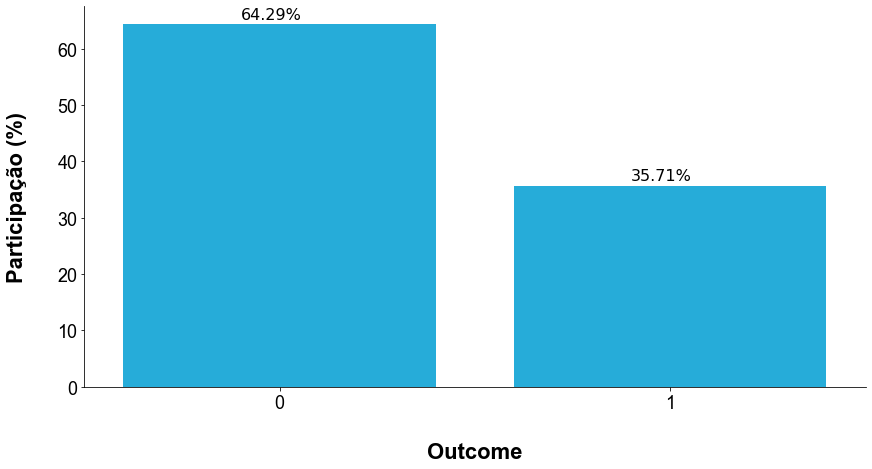

In [7]:
# Calcular particapaçãp percentual
Cont_REG=pd.DataFrame(   round(df['Outcome'].value_counts(normalize=True)*100,2)    )
Cont_REG['nome']=Cont_REG.index
#Tamanho da Figura
plt.figure(figsize=(14,7))
#Figura
cor_a, cor_b=[plt.cm.Reds, plt.cm.Blues]
ax = sns.barplot(x="nome", y="Outcome",color='#00BFFF',saturation=.7,data=Cont_REG)
#Titulo das barras
for p in ax.patches:
        ax.annotate('{}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1),fontsize=16,rotation=0)
#Tirar bordas
sns.despine(bottom = False, left = False)
#Eixos
plt.xlabel('Outcome',fontsize=22,labelpad=30,weight='bold',family='Arial')
plt.ylabel('Participação (%)',fontsize=22,labelpad=30,weight='bold',family='Arial')
#Rotulos ds eixos
plt.xticks(fontsize=18,family='Arial')
plt.yticks(fontsize=18,family='Arial')
ax=ax
print('\033[1m' "\n FIGURA 1: DISTRIBUIÇÃO DE CLASSES DA VARIÁVEL OUTCOME  \n")

<span style='font-family:"Times New Roman"'>
    
A Figura 2 apresenta as distribuição dos pares de variáveis de acordo como o  *Outcome*. Observa-se que a maiorias das classes não apresenta relação significantes. O gráfico de pares também indica eventuais dificuldades em separar as classes


 FIGURA 2: DISTRIBUIÇÃO DOS PARES DE VARIÁVEIS  



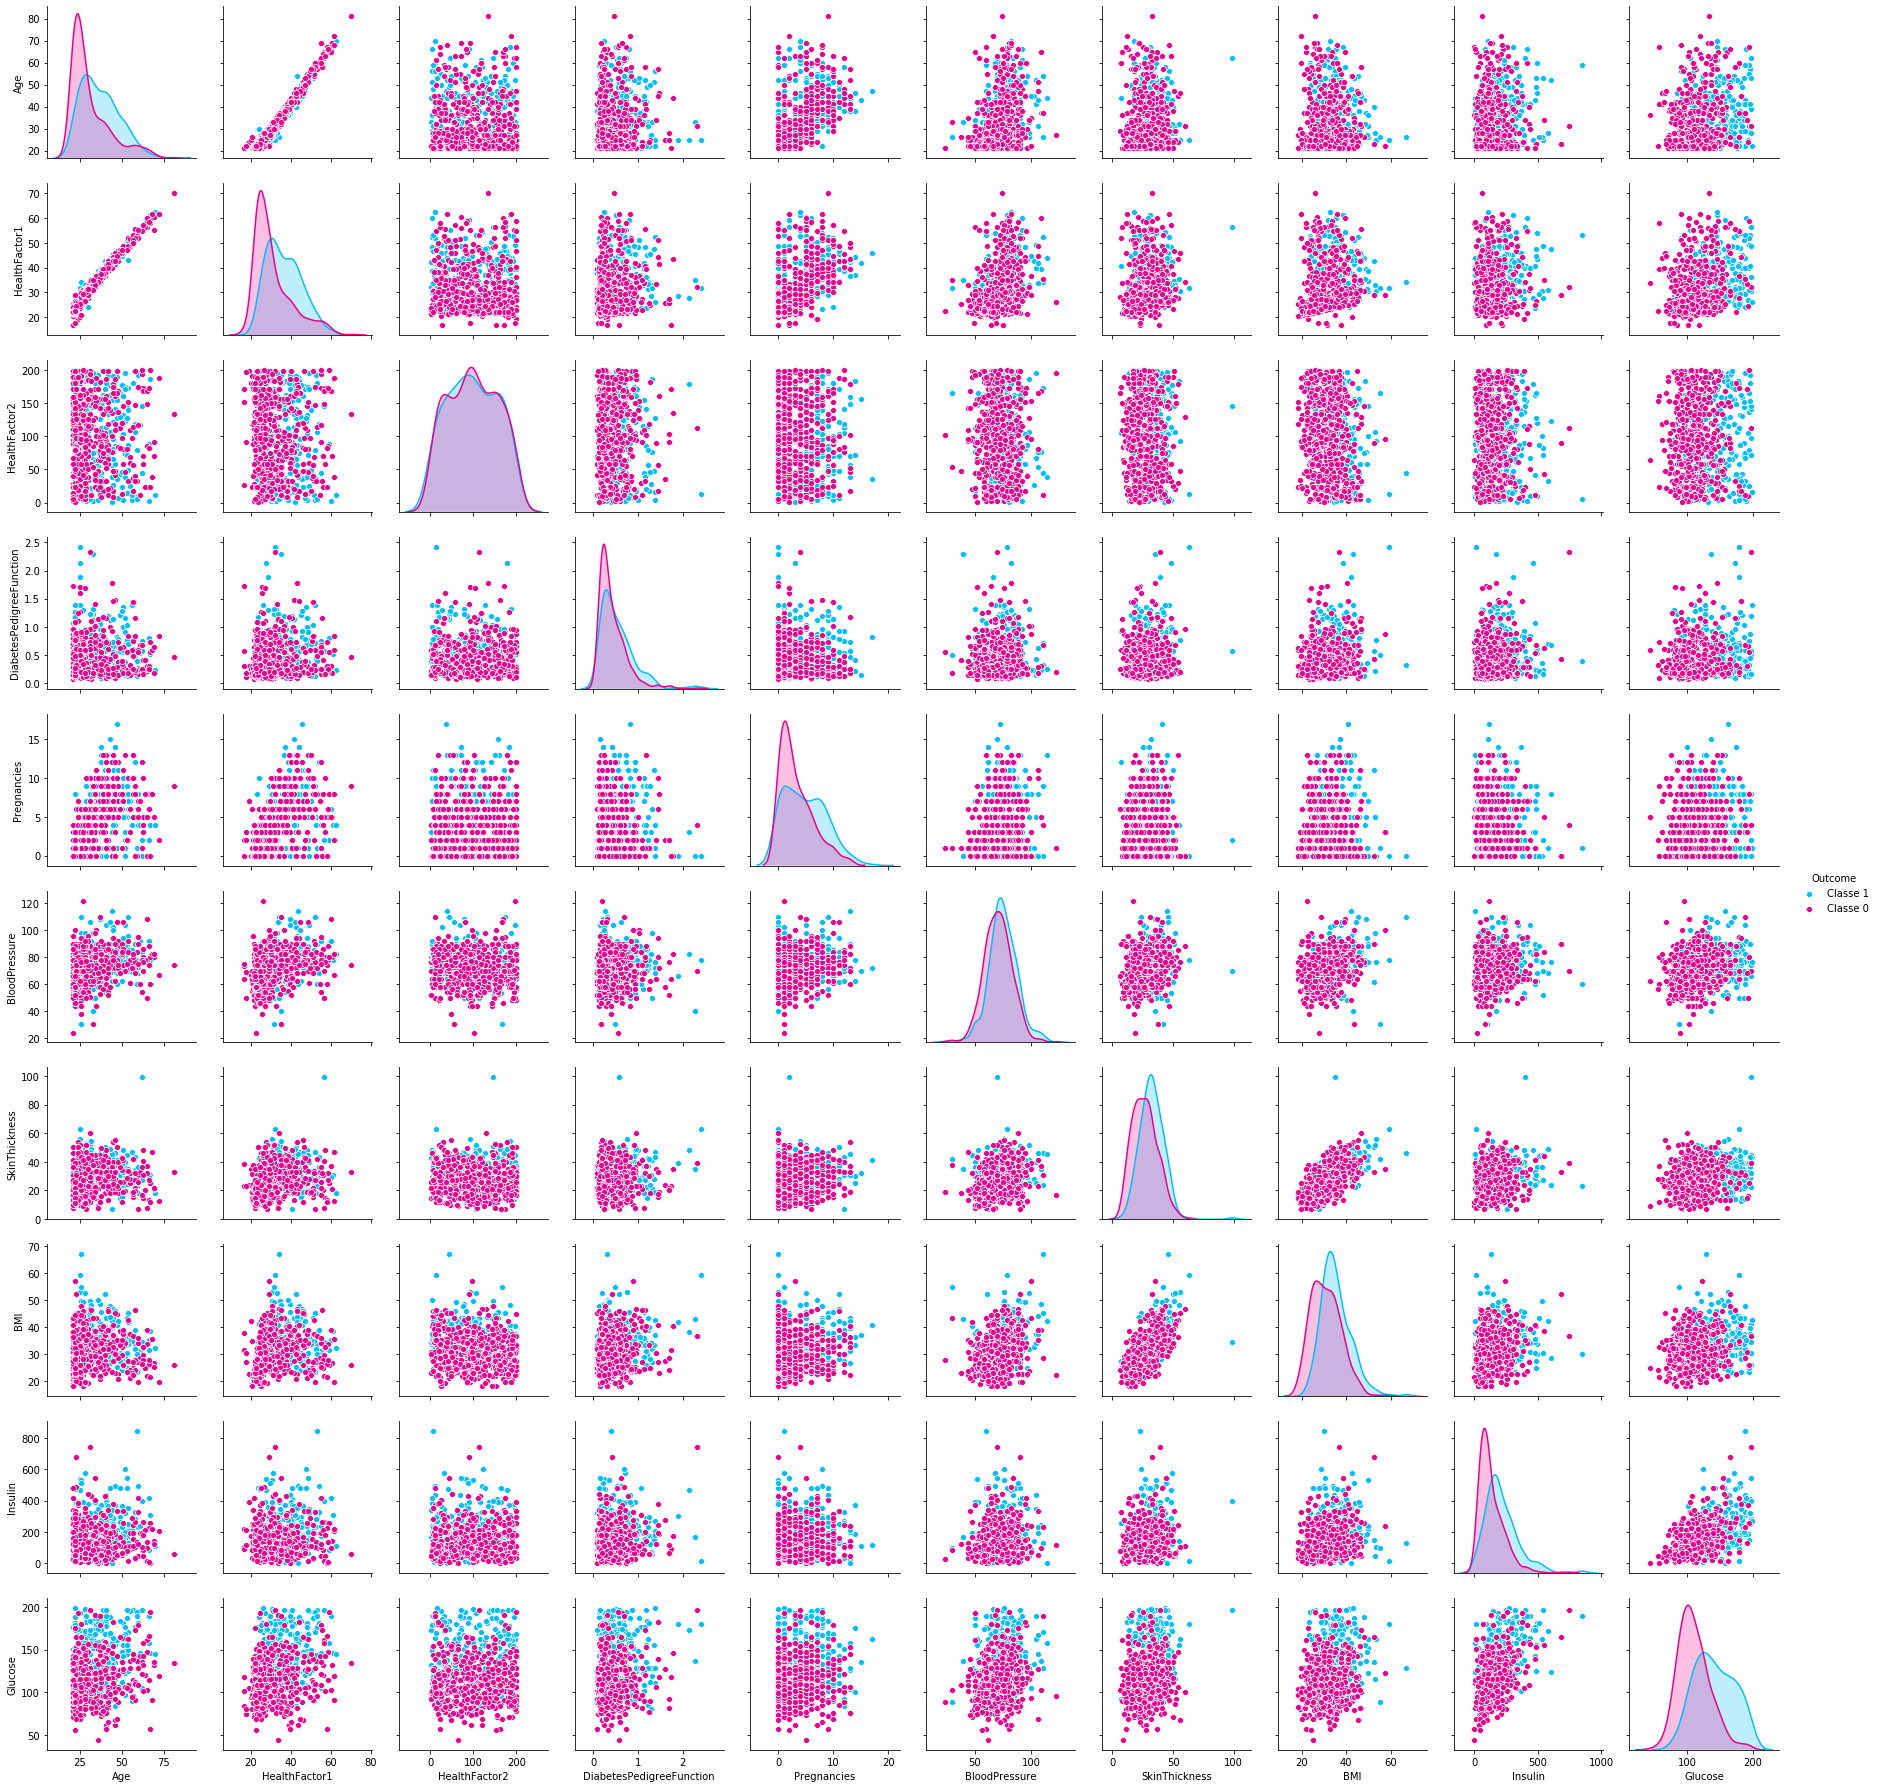

In [8]:
#Pair plot por avalição
sub_df=df[['Age', 'HealthFactor1', 'HealthFactor2', 'DiabetesPedigreeFunction','Pregnancies',
           'BloodPressure', 'SkinThickness', 'BMI','Insulin', 'Glucose','Outcome']]
sub_df['Outcome']=sub_df['Outcome'].map({0:'Classe 0',1:'Classe 1'})
ax = sns.pairplot(sub_df,palette=["#00BFFF","#ec008b"],hue='Outcome',)
#Rotulos ds eixos
plt.xticks(fontsize=20,family='Arial',rotation=0)
plt.yticks(fontsize=20,family='Arial',rotation=0)
ax=ax
print('\033[1m' "\n FIGURA 2: DISTRIBUIÇÃO DOS PARES DE VARIÁVEIS  \n")

___
<span style='font-family:"Times New Roman"'>
    
## 1.7.Detecção e Substituição de *Outliers*

As Figura 3 diagrama de caixa (*boxplot*) de algumas variáveis do banco de dados. Observam-se possíveis valores extremos (*outliers*). Vale ressaltar que só um especialista poderia confirmar se de fato são *outliers*


 FIGURA 3: VARIÁVEIS COM VALORES POSSÍVEIS VALORES EXTREMOS  



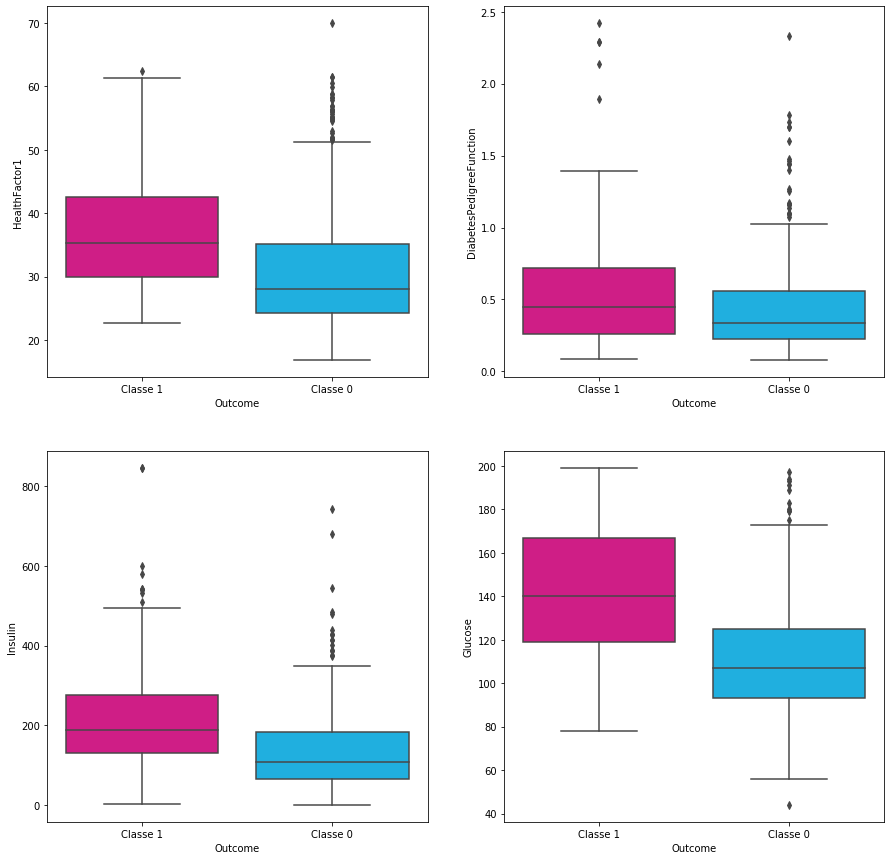

In [9]:
fig, axes = plt.subplots(2, 2,figsize=(15,15))

ax = ax=sns.boxplot(x='Outcome', y="HealthFactor1", data=sub_df, palette=["#ec008b","#00BFFF"],ax=axes[0, 0])
ax = ax=sns.boxplot(x='Outcome', y="DiabetesPedigreeFunction", data=sub_df, palette=["#ec008b","#00BFFF"],ax=axes[0, 1])
ax = ax=sns.boxplot(x='Outcome', y="Insulin", data=sub_df, palette=["#ec008b","#00BFFF"],ax=axes[1, 0])
ax = ax=sns.boxplot(x='Outcome', y="Glucose", data=sub_df, palette=["#ec008b","#00BFFF"],ax=axes[1, 1])

print('\033[1m' "\n FIGURA 3: VARIÁVEIS COM VALORES POSSÍVEIS VALORES EXTREMOS  \n")

<span style='font-family:"Times New Roman"'>
    
Assumindo (só um especialista pode confirmar com certeza) que os valores acima do 95° percentil e abaixo do °5 são *outliers* .Os valores extremos foram substituídos pelos percentis mais próximos.

In [10]:
# Outliers para valor mais próximo
def replace(df: pd.DataFrame) -> pd.DataFrame:
    return df.apply(lambda x: mstats.winsorize(x, limits=[.05, .05]))
df_temp = replace(df.drop('Outcome', axis=1))
df = df_temp.join(df['Outcome'].astype('float'))

___
<span style='font-family:"Times New Roman"'>
    
## 1.8. Correlações

A Figura 5 ilustra as correlações entra as variáveis do banco de dados. Destacam-se as seguintes correlações: 

*  *HealthFactor1* e *Age*          (0.99+) - Bastante evidende na Figura 2

* *Pregnancies* e *Age*             (0.57+)

* *Glucose* e *Insulin*             (0.57+)

* *Pregnancies* e *HealthFactor1*   (0.56+)

* *Glucose* e *Outcome*             (0.50+)

Nenhuma das correlções neagtivas foi significante


 FIGURA 4: CORRELAÇÕES ENTRE AS VARIÁVEIS  



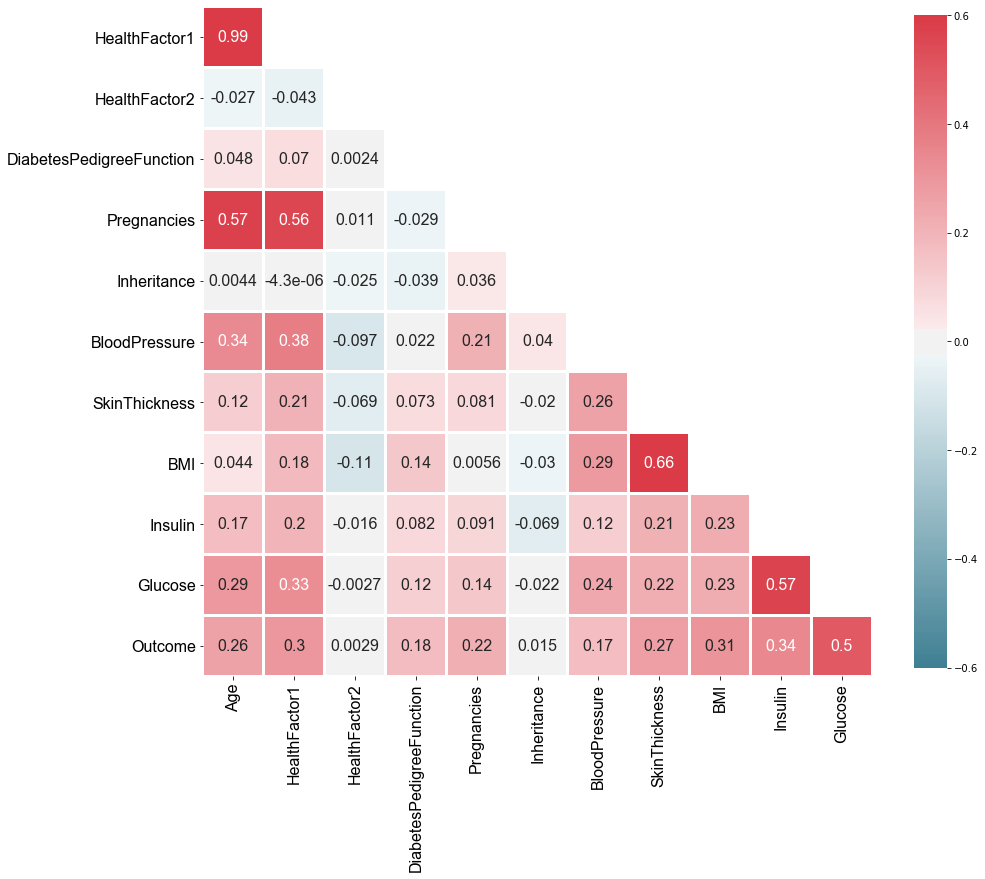

In [11]:
#Matriz de correlação completa
corr=df.corr()
#Tamanho da figura
plt.figure(figsize=(15,15))
# Mascara
mask = np.triu(np.ones_like(corr, dtype=np.bool))
mask[np.triu_indices_from(mask)] = True
# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Matriz de correlação na forma de heatmap
ax=sns.heatmap(corr,mask=mask, cmap=cmap, annot=True,                            
annot_kws={"size":16,"family":'Arial'},vmax=0.6,vmin=-0.6,center=0, square=True,                            
linewidths=2,cbar_kws={"shrink": 0.8} )              
#Rotulos ds eixos
plt.xticks(fontsize=16,family='Arial',rotation=90)
plt.yticks(fontsize=16,family='Arial',rotation=0)
#Corrigir erros de plotagem 
ax.set_xlim(0,df.shape[1]-1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top+0.5)
ax=ax
print('\033[1m' "\n FIGURA 4: CORRELAÇÕES ENTRE AS VARIÁVEIS  \n")

___
<span style='font-family:"Times New Roman"'>
    
## 1.9 Conclusão do Tópico

Vale ressaltar que correlação não significa causa, seria precipitado afirmar que existem relações de causa e consequência entre as variáveis não sendo um especilista na temática. Dessa forma, dentre as informações extraídas, destaque-se: 

* O banco de dados contém registros de 798 pacientes;
 
* O banco possui 13 variáveis (excluindo a identificação dos pacientes);

* A variável insulina apresenta a maior disperção ($ cv=desv.pad / média=118.46 / 80.90= 1.46 $);
  
* Os pacientes provavelmente são mulheres (considerando a presença da variável gravidez);

* Os pacientes possuem em média 33.43 anos;
 
* A maioria (75%) dos pacientes possui menos de 41;

* A maioria (75%) dos pacientes já engravidou pelo menos uma vez;

* Caso variável pressão sanguínea  refira-se a medição em sistole,todos os pacientes apresetam nivés de pressão normal ($normal_s=pressão<120 ±5 mm/Hg$).Caso variável pressão sanguínea refira-se a medição em diastole , a maioria (75%) dos pacientes apresenta pressão normal ($normal_d=pressão<80 ±3 mm/Hg$);

*  Considerando que mesma é variável objetivo é binária, esse banco de dados foi formulada para um problema de classificação.

* As classes da variavél objetivo são desbalancedas;

* Os pacientes mais velhos possuem um *HealthFactor1* maior e a tendência de apresentar um maior número de gravidezes.

* A taxa de glicose é a variável mais influente na variável objetivo do problema;

* As classes da variável alvo são pouco separáveis, um modelo de classificação linear provavelmente apresentará um desempenho pouco satisfatório;






<hr style="border:1px solid black"> </hr>
<span style='font-family:"Times New Roman"'>
    
# 2. Modelagem

A fim de entender e avaliar o comportamento de diferentes classificadores no problema de previsão da variável *Outcome* , foi desenvolvida uma etapa de modelagem.

___
<span style='font-family:"Times New Roman"'>
    
## 2.1 Definição do *Input* e *Output*

Uma vez tratados os dados estão aptos para desenvolvimento de modelos de classificação. A princípio é ideal utilizar todas as variáveis do banco de dados na tarefa de prever a variável objetivo (y). Contudo, a variável *Inheritance* apresenta um número muito alto de informações faltantes que não podem ser preenchidas. Dessa forma, apesar de ser possível criar um sistema que alterne entre modelos de classificação de acordo como a presença desta variável, optou-se pela solução mais simples de desconsidera-la no problema de classificação.

O input (X) e output (y) dos modelos pretendidos foram:


In [12]:
#Definição de X e Y
X=df[['Age', 'HealthFactor1', 'HealthFactor2', 'DiabetesPedigreeFunction',
      'Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']]
y=df[['Outcome']]
#Escalar variáveis de entrada (Não é necessário para od classificadores escolhidos, 
# mas generaliza para possivéis casos onde seja necessário)
scaler = StandardScaler()
X=scaler.fit(X).transform(X)

___
<span style='font-family:"Times New Roman"'>
    
## 2.2. Validação Cruzada e a Escolha de um Modelo 

A melhor forma de escolher qual modelo usar em determinado problema, é verificar sua capacidade de generalização através da validação cruzada. Dessa forma foram analisadas as médias e desvios padrões da acurácia de diferentes modelos para avaliar seu desempenho bruto (seem nenhuma otimização de parâmetros).Baseado no resultados da Tabela 5 , o modelo de classificação escolhido foi o de floresta aleatória.

In [13]:
# Número de folds da validação cruzada (10 folds)
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
#Classificadores
clfs=[BernoulliNB(),LinearSVC(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),svm.SVC(kernel='rbf')]
nomes=['Naive Bayes','SVM-Linear','Regressão Logística','Ávore de Decisão','Floresta Aleatória','SVM-RBF']

#Acurácia dos classificadores
acuracias=[]
desvios=[]
for clf in clfs:    
#Validação com todos os dados
    scores = cross_val_score(clf,X,y, cv =k_fold)
    acuracias.append(scores.mean()*100)
    desvios.append(scores.std()*100)
    #print('Acurácia: Média {:.2f}% (+/-) Desv.Pad {:.2f}%'.format(scores.mean()*100,scores.std()*100))

#Tranforma resultado em tabela

acuracias=np.array(acuracias, dtype=np.float)
desvios=np.array(desvios, dtype=np.float)
variacao=(desvios/acuracias)*100

dic={'Classificador':nomes,'Acurácia Média (%)':acuracias,'Desv. Pad (%)':desvios ,'Coef.Variação (%)':variacao}
temp_tab=pd.DataFrame(data=dic,index=None)
temp_tab.sort_values(by=['Acurácia Média (%)'], ascending=False,inplace=True)
temp_tab.reset_index(drop=True,inplace=True)
print('\033[1m' "\n TABELA 5: DESEMPENHO DOS MODELOS AVALIADOS (VALIDAÇÃO CRUZADA 10-FOLDS)  \n")
temp_tab



 TABELA 5: DESEMPENHO DOS MODELOS AVALIADOS (VALIDAÇÃO CRUZADA 10-FOLDS)  



,Classificador,Acurácia Média (%),Desv. Pad (%),Coef.Variação (%)
0,Floresta Aleatória,74.928797,4.088678,5.456751
1,Regressão Logística,74.052215,3.422468,4.621696
2,SVM-RBF,74.050633,4.137971,5.588030
3,SVM-Linear,73.803797,3.035396,4.112791
4,Naive Bayes,69.045886,3.780196,5.474904
5,Ávore de Decisão,68.174051,6.603150,9.685724


___
<span style='font-family:"Times New Roman"'>
    
## 2.3. Otimização do Modelo Escolhido

Após escolher o modelo de classificação, é pertinente extrair o melhor desempenho possível do mesmo. Dessa forma, os parâmetros do modelo de floresta foram otimizados (tomando como função objetivo a maximização da acurácia) através do método de busca em grade (o mais simples de todos).Vale destacar que utilizando a técnica de *holdout* , o desempenho de treino foi superior ao observado na validação cruzada porém o desempenho de teste foi inferior para mesma comparação (provavelmente devido a uma partição desfavorável dos dados)

In [14]:
# Seperar treino do teste de forma estratificada (70/30)
x_treino, x_teste,y_treino,y_teste = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)
# Definir
floresta = RandomForestClassifier() 

#Definir hiperpâemtros (escolhidos por experiência)
n_estimators =      [500, 800]
max_depth =         [5, 10]
min_samples_split = [10, 15]
min_samples_leaf =  [2, 5] 

hiper = dict( n_estimators = n_estimators, max_depth = max_depth,  
               min_samples_split = min_samples_split, 
               min_samples_leaf = min_samples_leaf)

# Otimiação em grid
gride = GridSearchCV(floresta,hiper,cv=10,verbose=True, n_jobs=-1)

# Treinar
gride.fit(x_treino, y_treino)

# Redefinir modelo padrão como o modelo com melhor parâmetros
floresta=gride.best_estimator_

#Acurácia 
acuaracia_treino=floresta.score(x_treino,y_treino)
acuaracia_teste=floresta.score (x_teste,y_teste)

print('Acurácia de treino {}%'.format(round(acuaracia_treino*100,2)))
print('Acurácia de teste  {}%'.format(round(acuaracia_teste*100,2)))
# #Novo CV (opcional)
# clf=floresta
# scores = cross_val_score(clf,X,y, cv =k_fold)
# print('Acurácia Média (CV-10) {:.2f}% ± {:.2f}%'.format(scores.mean()*100,scores.std()*100))

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.3min finished


Acurácia de treino 83.33%
Acurácia de teste  72.08%


___
<span style='font-family:"Times New Roman"'>
    
## 2.4. Avaliação do Modelo

Até então a acurácia foi utilizada como métrica de avaliação e escolha do modelo. Contudo em problemas de classificação onde as classes estão desbalanceadas, como nesse banco de dados, a acurácia não é a melhor forma de avaliar o modelo quando a classe menos frequente é justamente a que se deseja identificar.

<span style='font-family:"Times New Roman"'>
    
#### MATRIZ DE CONFUSÃO
A matriz de confusão na Figura 5, ilustra como a classe menos frequente apresenta, proporcionalmente, o maior número de erros de classificação.


 FIGURA 5: MATRIZ DE CONFUSÃO   



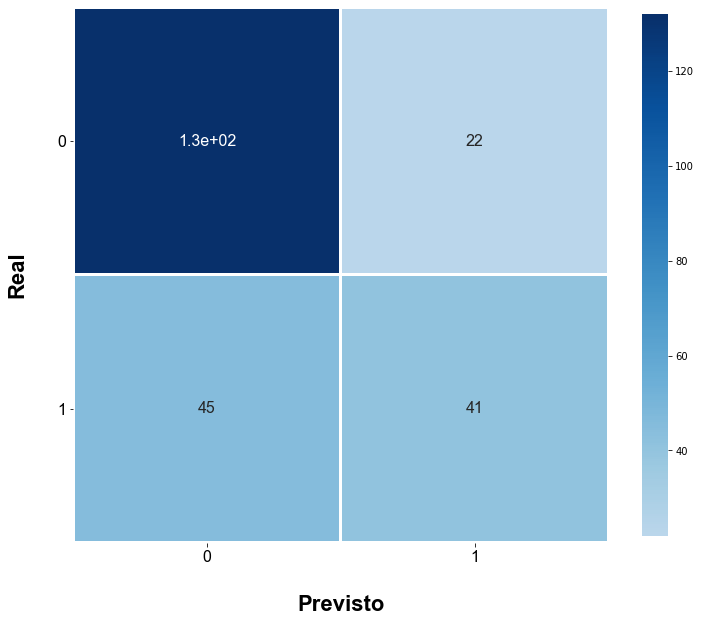

In [15]:
#Matriz de confusão
cf_matrix=confusion_matrix(y_teste, floresta.predict(x_teste) )
entrada=cf_matrix
maximo=entrada.max().max()
minimo=entrada.min().min()
centro=(maximo-minimo)/2
# Tamanhonda figura 
plt.figure(figsize=(12,12))
# Matriz de correlação na forma de heatmap
ax=sns.heatmap(entrada,annot=True,annot_kws={"size":16,"family":'Arial'},cmap='Blues',
vmax=maximo,vmin=minimo,center=centro,linewidths=2,cbar_kws={"shrink": 0.8},square=True )                             
#Rotulos ds eixos
plt.xticks(fontsize=16,family='Arial',rotation=0)
plt.yticks(fontsize=16,family='Arial',rotation=0)
#Eixos
plt.xlabel('Previsto',fontsize=22,labelpad=30,weight='bold',family='Arial')
plt.ylabel('Real',fontsize=22,labelpad=30,weight='bold',family='Arial')
#Corrigir erros de plotagem 
ax.set_xlim(0,2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)
print('\033[1m' "\n FIGURA 5: MATRIZ DE CONFUSÃO   \n")
ax=ax

<span style='font-family:"Times New Roman"'>
    
#### REVOCAÇÃO , PRECISÃO, F1

Como esperado, a classe menos frequente apresentou os piores índices de precisão e F1 ("significância" da métrica acurácia), como ilustrado na Figura 6. Destaca-se, o índice de revocação (*recall*) muito inferior ao da classe mais frequente. 


 FIGURA 6: MÉTRICAS DO MODELO   



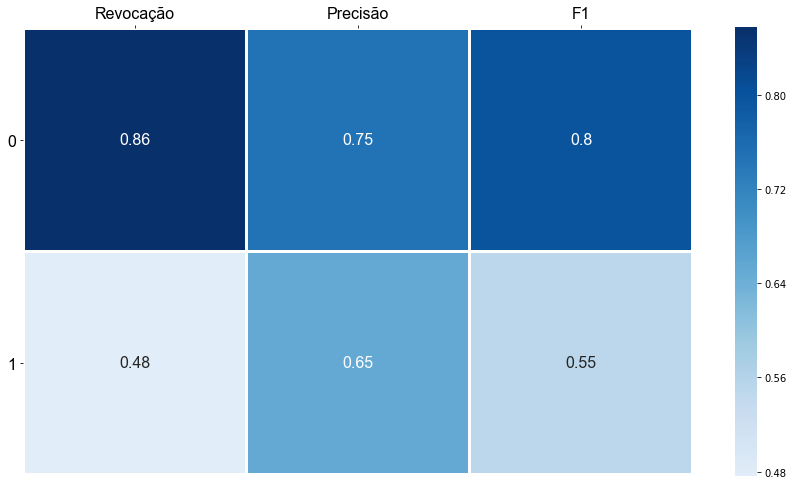

In [16]:
# EM FORMA DE TABELA 
y_true = y_teste
y_pred = floresta.predict(x_teste)
target_names = [0,1]
tab=classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
tab = pd.DataFrame(tab).transpose()
# Separar parte importante 
# Separar parte importante 
tab=tab[['recall','precision','f1-score']]
tab.rename(columns={ 'recall':'Revocação','precision':'Precisão','f1-score':'F1'},inplace=True)
tab=tab.loc[[0, 1]]

# EM FORMA DE HEATMAP
entrada=tab
maximo=entrada.max().max()
minimo=entrada.min().min()
centro=(maximo)*0.75
#Tamnaho da figura 
plt.figure(figsize=(15,15))
# Matriz de correlação na forma de heatmap
ax=sns.heatmap(entrada,annot=True,annot_kws={"size":16,"family":'Arial'},cmap='Blues',
vmax=maximo,vmin=minimo,center=centro,square=True, linewidths=2,cbar_kws={"shrink": 0.55} )            
#Rotulos ds eixos
ax.xaxis.tick_top()
plt.xticks(fontsize=16,family='Arial',rotation=0)
plt.yticks(fontsize=16,family='Arial',rotation=0)
#Corrigir erros de plotagem 
ax.set_xlim(0,3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)
print('\033[1m' "\n FIGURA 6: MÉTRICAS DO MODELO   \n")
ax=ax

<span style='font-family:"Times New Roman"'>

#### CURVA ROC 

A curva ROC costuma não ser uma forma muito eficiente de avaliar modelos de classificação desbalanceado  $^a$. A Figura 7, é exemplo de como ,apesar do aparente bom desempenho no espaço ROC, o modelo ainda sim pode ser inadequado para o problema .

*a* - Isso se aplica a classificadores binários, como o deste trabalho, em problemas de múltiplas classes desbalanceadas a curva ROC é uma forma muito interessante de avaliação.


 FIGURA 7: CURVA ROC   



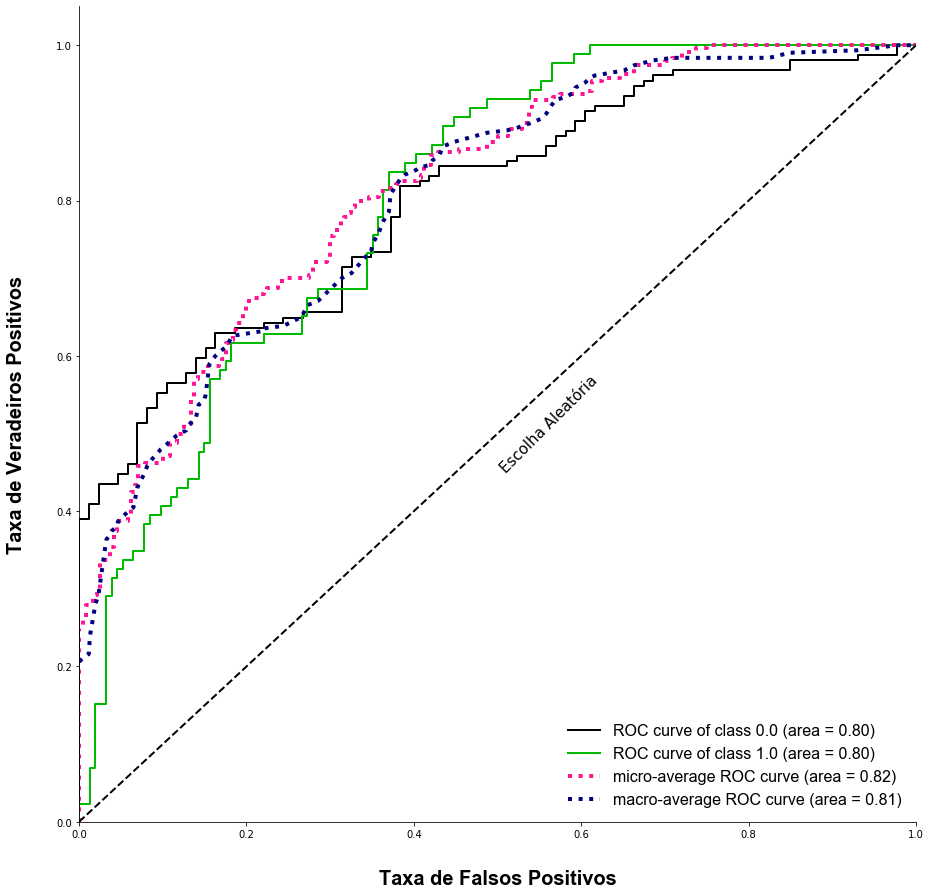

In [17]:
# Esse trecho é util para problemas com mais de um classe
figsize=(15,15)
y_true = y_teste
y_probas =floresta.predict_proba(x_teste)
ax=skplt.metrics.plot_roc_curve(y_true, y_probas,figsize=(15,15))
#Tirar bordas
sns.despine(bottom = False, left = False)
#Eixos
plt.xlabel('Taxa de Falsos Positivos',fontsize=20,labelpad=30,weight='bold',family='Arial')
plt.ylabel('Taxa de Veradeiros Positivos',fontsize=20,labelpad=30,weight='bold',family='Arial')
#Anotações
txkw = dict(size=15, color ='k',rotation=45)
tx = "Escolha Aleatória"
ax.text(0.5,0.45, tx, **txkw)
#Legenda
plt.legend(loc="lower right",prop={'family': 'Arial','size':16},frameon=False)
plt.title(None)
print('\033[1m' "\n FIGURA 7: CURVA ROC   \n")
ax=ax

___
<span style='font-family:"Times New Roman"'>
    
## 2.5. Conclusão do Tópico


A partir dos resultados observados foram extraídas as seguintes conclusões:

* O modelo de floresta aleatória melhor se adaptou ao problema de classificação proposto (considerando sua acurácia média). Contudo, o mesmo poderia ser substituído sem perdas significativas por um modelo de Regressão Logística (linear, mais simples);

* A acurácia pode não ser a melhor métrica para avaliar este problema de classificação caso a classe que se deseja identificar for a menos frequente;

* Todas as métricas de avaliação pertinentes a classe menos frequente, foram insatisfatórias quando comparadas a classe mais frequente; 

* Caso a classe menos frequente seja de fato a classe de interesse, tanto o processo de escolha do modelo quanto o de otimização devem ser refeitos focando nos valores de revocação e F1 dessa classe;

* Todas as conclusões feitas nesse relatório podem ser sustentadas ou refutadas por um conhecedor da temática (ciências biológicas).O que corrobora com a ideia que antes de desenvolver um trabalho  a partir de um banco de dados qualquer , é necessário estabelecer objetivos claros e preferivelmente com o acompanhamento de um especialista no assunto (caso o analista não seja).


<hr style="border:1px solid black"> </hr>
<span style='font-family:"Times New Roman"'>
    
# 3. Referências


[1]	G. Piatetsky-Shapiro, R. Brachman, T. Khabaza, W. Kloesgen, e E. Simoudis, “An Overview of Issues in Developing Industrial Data Mining and Knowledge Discovery Applications”, Proc. Second Int. Conf. Knowl. Discov. Data Min., p. 89–95, 1996.

[2]	M. A. Munson, “A study on the importance of and time spent on different modeling steps”, ACM SIGKDD Explor. Newsl., vol. 13, no 2, p. 65–71, 2012.

[3]	F. Amalina et al., “Blending Big Data Analytics: Review on Challenges and a Recent Study”, IEEE Access, vol. 8, p. 3629–3645, 2020.

[4]	V. Domingues, “Desenvolvimento de sistema OLAP para análise de informação de gestão académica da UC”, Universidade de Coimbra, 2014.

[5]	R. Nisbet, J. Elder, e G. Miner, “Model Complexity (and How Ensembles Help)”, in Handbook of Statistical Analysis and Data Mining Applications, First., Amasterdan: Elsevier Inc., 2009.



